In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
os.chdir("/content/drive/My Drive/Colab Notebooks")

Mounted at /content/drive/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# loading data
df = pd.read_csv("mentalhealth_global.csv", low_memory = False)
display(df)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     6468 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       6468 non-null   int64  
 3   Schizophrenia (%)          6468 non-null   float64
 4   Bipolar disorder (%)       6468 non-null   float64
 5   Eating disorders (%)       6468 non-null   float64
 6   Anxiety disorders (%)      6468 non-null   float64
 7   Drug use disorders (%)     6468 non-null   float64
 8   Depression (%)             6468 non-null   float64
 9   Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 505.4+ KB


In [ ]:
# removing missing values
df.dropna(axis=0, inplace = True)

In [ ]:
# remplacing code column
df.drop(['Code'], axis=1)

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [ ]:
# assigning numeric values to categories(countries)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Code'] = le.fit_transform(df['Entity'])
display(df)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,0,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,0,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,0,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,0,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,0,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,195,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,195,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,195,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,195,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [ ]:
# renaming columns and removing percentages
df.columns = ['country', 'code', 'year', 'schizophrenia', 'bipolar_disorder', 'eating_disorders', 'anxiety_disorders', 'drug_use_disorders', 'depression', 'alcohol_use_disorders']

In [ ]:
display(df)

,country,code,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
0,Afghanistan,0,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,0,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,0,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,0,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,0,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,195,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,195,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,195,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,195,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [ ]:
print(df.describe())

              code         year  schizophrenia  bipolar_disorder  \
count  5488.000000  5488.000000    5488.000000       5488.000000   
mean     97.500000  2003.500000       0.208183          0.716884   
std      56.584746     8.078483       0.041998          0.164246   
min       0.000000  1990.000000       0.146902          0.314535   
25%      48.750000  1996.750000       0.179452          0.615732   
50%      97.500000  2003.500000       0.198510          0.693954   
75%     146.250000  2010.250000       0.230553          0.830217   
max     195.000000  2017.000000       0.375110          1.206597   

       eating_disorders  anxiety_disorders  drug_use_disorders   depression  \
count       5488.000000        5488.000000         5488.000000  5488.000000   
mean           0.234023           3.946979            0.833328     3.474504   
std            0.154147           1.134810            0.441199     0.671741   
min            0.073908           2.023393            0.383650     2.13

In [ ]:
# creating a linear regression based on the mean of each mental health disorder from each year
df1 = df.groupby("year")[('schizophrenia', 'bipolar_disorder', 'eating_disorders', 'anxiety_disorders', 'drug_use_disorders', 'depression', 'alcohol_use_disorders')].mean()
print(df1)

      schizophrenia  bipolar_disorder  eating_disorders  anxiety_disorders  \
year                                                                         
1990       0.206112          0.713111          0.216995           3.920882   
1991       0.206150          0.713426          0.217173           3.923763   
1992       0.206197          0.713749          0.217453           3.926652   
1993       0.206252          0.714062          0.217890           3.929325   
1994       0.206310          0.714366          0.218461           3.931912   
1995       0.206368          0.714633          0.219176           3.933972   
1996       0.206436          0.714881          0.220160           3.935743   
1997       0.206529          0.715149          0.221464           3.937853   
1998       0.206641          0.715429          0.222960           3.940195   
1999       0.206768          0.715707          0.224552           3.942544   
2000       0.206904          0.715964          0.226055         

<ipython-input-12-87adff0d6099>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby("year")[('schizophrenia', 'bipolar_disorder', 'eating_disorders', 'anxiety_disorders', 'drug_use_disorders', 'depression', 'alcohol_use_disorders')].mean()


R2 score for schizophrenia: -70449.22849589468
Cross-validation scores: [0.78359275 0.97637911 0.98644738 0.95791734 0.96091288]


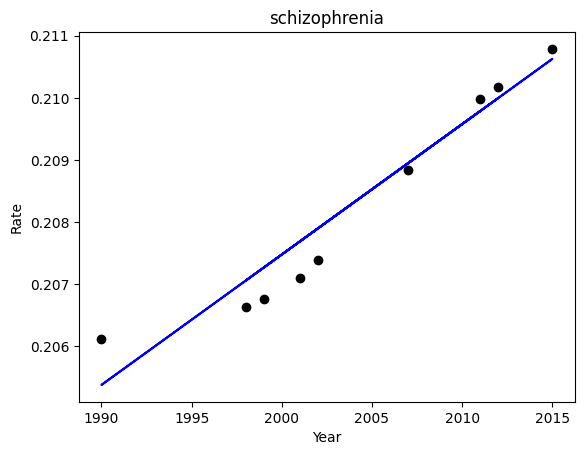

R2 score for bipolar_disorder: -70413.45560058126
Cross-validation scores: [0.998302   0.9995792  0.9998194  0.99948951 0.99827956]


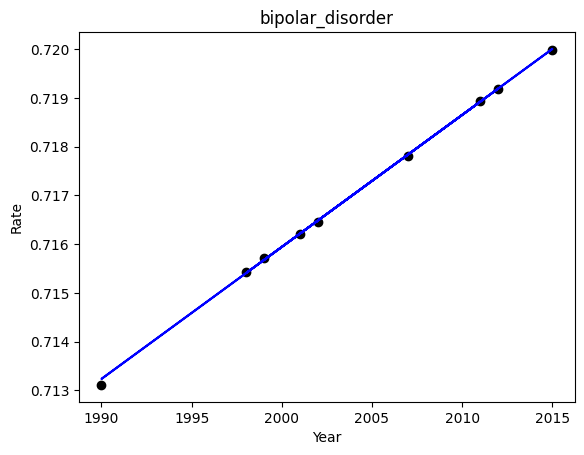

R2 score for eating_disorders: -70447.37054479682
Cross-validation scores: [0.91940455 0.98975562 0.99582949 0.98287245 0.9772334 ]


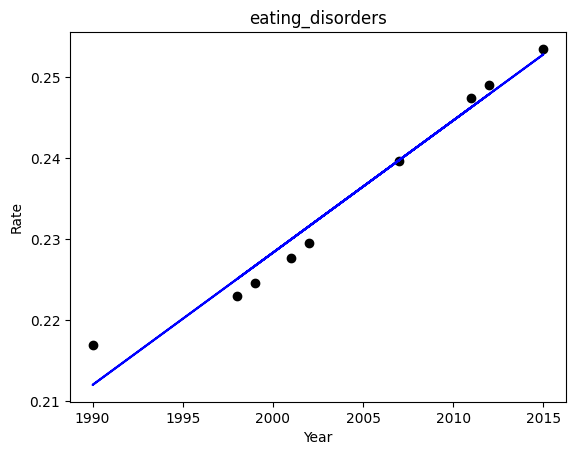

R2 score for anxiety_disorders: -70186.5002625908
Cross-validation scores: [0.9175829  0.97297992 0.95036681 0.90395824 0.92704237]


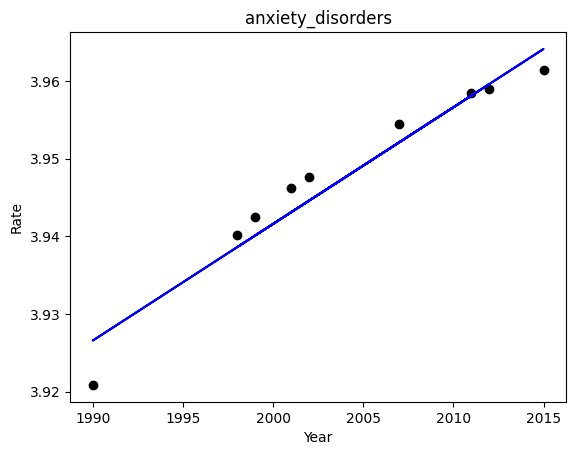

R2 score for drug_use_disorders: -70405.09410566636
Cross-validation scores: [0.97347924 0.99388638 0.99375906 0.94908638 0.99054494]


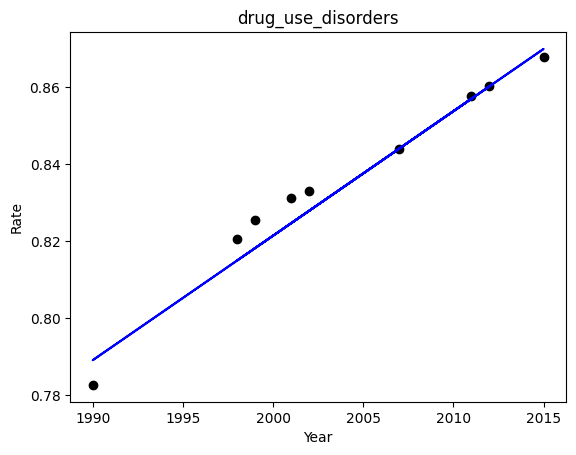

R2 score for depression: -70219.79474402868
Cross-validation scores: [-6.80126162  0.82032532  0.89329304  0.85741041  0.73968228]


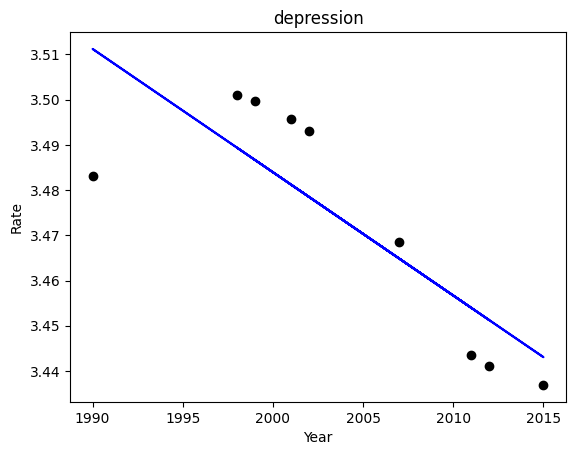

R2 score for alcohol_use_disorders: -70353.92596713742
Cross-validation scores: [-0.13376298  0.83878347  0.84095463 -0.01808315  0.47258038]


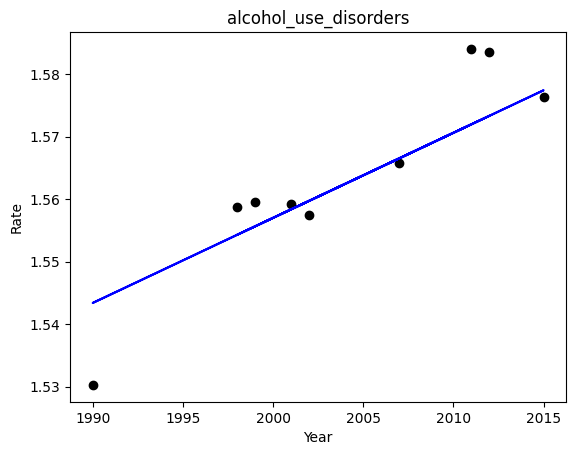

In [ ]:
# using for-loop to apply code to each column in a single block
for c in df1.columns:

    # Selecting features and labels
    X = df1.index.values.reshape(-1, 1)
    y = df1[c].values.reshape(-1, 1)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create linear regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculating the R^2 score for the model
    r2 = model.score(y_test, y_pred)
    print(f"R2 score for {c}: {r2}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")

    # Creating scatterplots
    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, model.predict(X_test_scaled), color='blue')
    plt.title(c)
    plt.xlabel('Year')
    plt.ylabel('Rate')
    plt.show()